In [100]:
import pandas as pd
#import modin.pandas as pd
import numpy as np
import matplotlib
import os
import glob
import math
#import shapefile as shp
import re
import copy
from pyecharts.render import make_snapshot
#from snapshot_selenium import snapshot
#from selenium import webdriver
#from webdriver_manager.chrome import ChromeDriverManager
#from snapshot_selenium import snapshot as driver
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot
# driver = webdriver.Chrome(executable_path='C:/Python38/Scripts/chromedriver.exe')
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
import threading
from concurrent.futures import ThreadPoolExecutor
from collections import deque
from datetime import *

In [101]:
# only a temporary path
import os
path = '/root/CSC440_project/data_general'
path

'/root/CSC440_project/data_general'

In [22]:
def findfiles(path):
    return glob.glob(path)
working_directory = '/root/CSC440_project/data_general/tweets/*/'
tweets_path_list = findfiles(working_directory)
tweets_list = os.listdir('/root/CSC440_project/data_general/tweets')

In [12]:
# read location csv
location_to_join = pd.read_csv('/root/CSC440_project/data_general/locations_combined.csv', header = None, names = ['id','location'])

In [13]:
# convert all read id into string format
location_to_join['id'] = [str(i) for i in location_to_join['id']]
location_to_join

id location
0       5711341129       ÂÖ∂‰ªñ
1       7412051152       ÂÖ∂‰ªñ
2       7568601498       ÂÖ∂‰ªñ
3       1804028250    Âπø‰∏ú ÂπøÂ∑û
4       7448767160       ÂõõÂ∑ù
...            ...      ...
574395  6090644549       Âåó‰∫¨
574396  5940170360       ÂÖ∂‰ªñ
574397  3949398197    Â±±Ë•ø Êôã‰∏≠
574398  5266395467    Â±±Ë•ø ÂêïÊ¢Å
574399  6396421973       ÂÖ∂‰ªñ

[574400 rows x 2 columns]

In [23]:
# read users file
users = pd.read_csv(path+'/combined.csv')
#users = users.drop(users.index[1028030])

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
# rename and select all focused columns
users = users.rename(columns={'Áî®Êà∑id':'id','ÊÄßÂà´': 'gender','ÂæÆÂçöÊï∞':'#tweets', 'Á≤â‰∏ùÊï∞': '#follower', 'ÂÖ≥Ê≥®Êï∞': '#following','ÊòØÂê¶ËÆ§ËØÅ':'verified'})
users = users[['id','gender','#tweets','#follower','#following','verified']]
users = users.drop_duplicates()
users['id'] = [str(i) for i in users['id']]

In [26]:
users

id gender  #tweets  #follower  #following  verified
0        6309921628      f     2902        344         403     False
1        6007931743      m       11         20         163     False
2        7471743898      m        5         10         265     False
3        5701747600      f     3175      95113        1052     False
4        7577162125      m       25          3         190     False
...             ...    ...      ...        ...         ...       ...
1028024  7448723682      m        0          1         214     False
1028025  5343183078      m      418        148         336     False
1028026  7645855842      m       21          1          22     False
1028027  6031048952      f      183          1        1116     False
1028028  1710915832      f     7654        486        1288     False

[976441 rows x 6 columns]

In [27]:
user_id_lst = location_to_join['id']

In [28]:
# for the user table, add a new column that records whether he/she has actuially post weibo or not
users['content'] = np.zeros(len(users))
users.loc[users['id'].isin(user_id_lst), 'content'] = 1  


In [29]:
users

id gender  #tweets  #follower  #following  verified  content
0        6309921628      f     2902        344         403     False      1.0
1        6007931743      m       11         20         163     False      1.0
2        7471743898      m        5         10         265     False      1.0
3        5701747600      f     3175      95113        1052     False      1.0
4        7577162125      m       25          3         190     False      1.0
...             ...    ...      ...        ...         ...       ...      ...
1028024  7448723682      m        0          1         214     False      0.0
1028025  5343183078      m      418        148         336     False      1.0
1028026  7645855842      m       21          1          22     False      0.0
1028027  6031048952      f      183          1        1116     False      1.0
1028028  1710915832      f     7654        486        1288     False      1.0

[976441 rows x 7 columns]

# CAUTION!!

In [30]:
with open('total_user.pkl','wb') as f:
    pickle.dump(users,f)

In [31]:
# merge two data frames
users_with_location = users.merge(location_to_join, how='inner', left_on='id', right_on='id')

In [32]:
# futher drop users 
users_with_content = users_with_location.drop_duplicates('id')
users_with_content = users_with_content.reset_index(drop=True)
users_with_content

id gender  #tweets  #follower  #following  verified  content  \
0       6309921628      f     2902        344         403     False      1.0   
1       6007931743      m       11         20         163     False      1.0   
2       7471743898      m        5         10         265     False      1.0   
3       5701747600      f     3175      95113        1052     False      1.0   
4       7577162125      m       25          3         190     False      1.0   
...            ...    ...      ...        ...         ...       ...      ...   
574352  6505005302      f       36         21         239     False      1.0   
574353  1803190527      f     6243       1409        2069     False      1.0   
574354  5343183078      m      418        148         336     False      1.0   
574355  6031048952      f      183          1        1116     False      1.0   
574356  1710915832      f     7654        486        1288     False      1.0   

       location  
0         Ê≤≥Âçó ËÆ∏Êòå  
1         Ê±üËãè Âçó‰∫¨  
2            ÂÖ∂‰ªñ  
3         ‰∏äÊµ∑ Êù®Êµ¶  
4         Â±±‰∏ú ÊµéÂçó  
...         ...  
574352       ÂÖ∂‰ªñ  
574353       ÊµôÊ±ü  
574354    Âåó‰∫¨ Êµ∑Ê∑Ä  
574355    Êµ∑Âçó Êµ∑Âè£  
574356    ‰∏äÊµ∑ ÈóµË°å  

[574357 rows x 8 columns]

# find and record the censored content, along with a counter on each user

In [31]:
class ConcurrentTweetsConfigList:
    __progress_bar = None
    """
    Helper class for managing list that supports asynchronously getting next user config.
    """

    def __init__(self, tweets_path_list):
        self.__tweets_path_list = tweets_path_list
        #self.__lock = threading.Lock()
        self.__iterator = iter(tweets_path_list)
        if ConcurrentTweetsConfigList.__progress_bar is None:
            ConcurrentTweetsConfigList.__progress_bar = tqdm(desc="#posts", unit="posts", total=len(self), position=0)
            ConcurrentTweetsConfigList.__progress_bar.display()

    def __next__(self):
        #with self.__lock:
        out = next(self.__iterator)
        ConcurrentTweetsConfigList.__progress_bar.update()
        return out

    def __iter__(self):
        """Each iterator will only point to self. This ensures each thread is iterating on the same iterator. """
        return self

    def __len__(self):
        return len(self.__tweets_path_list)

In [103]:
rename_dict = {
    'ËßÜÈ¢ëurl': 'reposter_device',  
    'ÂéüÂßãÂõæÁâáurl': 'reposting_time', 
    '‰ΩçÁΩÆ': '#likes', 
    'Êó•Êúü': '#comments', 
    'Â∑•ÂÖ∑': '#reposts', 
    'ÁÇπËµûÊï∞': 'repost_weibo_comment',
    'Ê∫êÁî®Êà∑id': 'source_user_id', 
    'Ê∫êÁî®Êà∑ÊòµÁß∞': 'source_user_nickname', 
    'Ê∫êÂæÆÂçöÂéüÂßãÂõæÁâáurl': 'source_weibo_post_time',
    'Ê∫êÂæÆÂçöËßÜÈ¢ëurl': 'source_weibo_device', 
    'Ê∫êÂæÆÂçö‰ΩçÁΩÆ': '#source_weibo_likes', 
    'Ê∫êÂæÆÂçöÊó•Êúü': '#source_weibo_comments', 
    'Ê∫êÂæÆÂçöÂ∑•ÂÖ∑': '#source_weibo_reposts', 
    'Ê∫êÂæÆÂçöÁÇπËµûÊï∞': 'source_weibo_content' 
}

rename_dict2 = {
    "Ê≠£Êñá": 'repost_weibo_comment',
    'Êó•Êúü': 'reposting_time',
    'Â∑•ÂÖ∑': 'reposter_device',
    'ÁÇπËµûÊï∞': '#likes',
    'ËØÑËÆ∫Êï∞':'#comments',
    'ËΩ¨ÂèëÊï∞': '#reposts',
    'Ê∫êÁî®Êà∑id': 'source_user_id',
    'Ê∫êÁî®Êà∑ÊòµÁß∞': 'source_user_nickname',
    'Ê∫êÂæÆÂçöÊ≠£Êñá': 'source_weibo_content',
    'Ê∫êÂæÆÂçöÊó•Êúü': 'source_weibo_post_time',
    'Ê∫êÂæÆÂçöÂ∑•ÂÖ∑': 'source_weibo_device',
    'Ê∫êÂæÆÂçöÁÇπËµûÊï∞': '#source_weibo_likes',
    'Ê∫êÂæÆÂçöËØÑËÆ∫Êï∞': '#source_weibo_comments',
    'Ê∫êÂæÆÂçöËΩ¨ÂèëÊï∞': '#source_weibo_reposts'
    
}

string1 = 'Êä±Ê≠âÔºåÁî±‰∫é‰ΩúËÄÖËÆæÁΩÆÔºå'
string2 = 'ËØ•ÂæÆÂçöÂõ†Ë¢´Â§ö‰∫∫ÊäïËØâ'
string3 = 'ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèç'
string4 = 'ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâ'
string5 = 'Êü•ÁúãÂ∏ÆÂä©Ôºö ÁΩëÈ°µÈìæÊé•'

censor_indications = [string1, string2, string2, string4, string5]

# resumption from break point?
def tweets_tackling(tweets_list, segment_index):
    censored_repost_list = deque()
    # /data_general/tweets/Áî®Êà∑Âêç/user_id.csv
    # count the number of censored reposts for each user
    # put then-censored reposts into one pandas dataframe
    
    for i in tqdm(tweets_list, desc="#posts", unit="posts", total=len(tweets_list), position=0):
        try:
            weibo_ = findfiles(i + '/*.csv')[0]
            id_ = os.path.splitext(os.path.basename(os.listdir(i)[0]))[0]
            user_weibo_df = pd.read_csv(weibo_)
            try:
                datetime.strptime(user_weibo_df['ÂéüÂßãÂõæÁâáurl'][0],'%a %b %d %X %z %Y')
                # needs rename
                user_weibo_df = user_weibo_df.drop(columns=['bid','id','Ê≠£Êñá','Â§¥Êù°ÊñáÁ´†url','Ê∫êÂæÆÂçö@Áî®Êà∑','Ê∫êÂæÆÂçöËØùÈ¢ò','Ê∫êÂæÆÂçöËΩ¨ÂèëÊï∞', 'Ê∫êÂæÆÂçöbid','Ê∫êÂæÆÂçöid','Ê∫êÂæÆÂçöÊ≠£Êñá', 'Ê∫êÂæÆÂçöÂ§¥Êù°ÊñáÁ´†url','ËØÑËÆ∫Êï∞', 'ËΩ¨ÂèëÊï∞', 'ËØùÈ¢ò', '@Áî®Êà∑', 'ÊòØÂê¶ÂéüÂàõ','Ê∫êÂæÆÂçöËØÑËÆ∫Êï∞']).rename(columns=rename_dict)
                user_weibo_df = user_weibo_df.assign(
                    user_id = id_,
                    is_censored_repost = user_weibo_df['source_weibo_content'].map(lambda content: any((keyword in str(content) for keyword in censor_indications)))
                )
            except TypeError:
                user_weibo_df = user_weibo_df.drop(columns=['id','bid','Â§¥Êù°ÊñáÁ´†url','ÂéüÂßãÂõæÁâáurl','ËßÜÈ¢ëurl','Ê∫êÂæÆÂçöËßÜÈ¢ëurl','Ê∫êÂæÆÂçö‰ΩçÁΩÆ','ÊòØÂê¶ÂéüÂàõ','Ê∫êÂæÆÂçöbid','ËØùÈ¢ò','@Áî®Êà∑','Ê∫êÂæÆÂçö@Áî®Êà∑','‰ΩçÁΩÆ','Ê∫êÂæÆÂçöid','Ê∫êÂæÆÂçöÂ§¥Êù°ÊñáÁ´†url','Ê∫êÂæÆÂçöÂéüÂßãÂõæÁâáurl','Ê∫êÂæÆÂçöËØùÈ¢ò']).rename(columns=rename_dict2)
                user_weibo_df = user_weibo_df.assign(
                    user_id = id_,
                    is_censored_repost = user_weibo_df['source_weibo_content'].map(lambda content: any((keyword in str(content) for keyword in censor_indications)))
                )
            censored_repost_list.extend((row for _, row in user_weibo_df.iterrows()))
        except IndexError:
            print(i)

#     with open('__user_censornumber_%s.pkl' %thread_num , 'wb') as f:
#         pickle.dump(user_censornumber, f)

#     with open('__user_tweetsnumber_%s.pkl' %thread_num, 'wb') as f:
#         pickle.dump(user_tweetsnumber, f)
    censored_repost_df = pd.DataFrame(list(censored_repost_list))
    
    with open('__raw_repost_df_%s.pkl' % segment_index, 'wb') as f:
        pickle.dump(censored_repost_df,f)

In [92]:
def main():
    segment_length = 50000
    for i in range(len(tweets_path_list)//segment_length + 1):
        path_segment = tweets_path_list[i*segment_length: (i+1)*segment_length]
        tweets_tackling(path_segment, segment_index)
#     with ThreadPoolExecutor(max_workers=6) as executor:
#         for i in range(6):
#             executor.submit(censored_tackling, concurrent_tweets_list, i)

In [ ]:
main()

In [105]:
test_df.head()

reposting_time reposter_device #likes  #comments  #reposts  \
0  Sun Aug 01 03:41:33 +0800 2021       iPhoneÂÆ¢Êà∑Á´Ø      1        0.0       0.0   
1  Sun Dec 27 22:39:03 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø      0        0.0       0.0   
2  Sun May 24 09:08:34 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø      3        0.0       0.0   
0  Mon Aug 02 15:54:07 +0800 2021    vivo ÂÖ®Êñ∞Ê∞¥Êª¥Â±èÊâãÊú∫      0        0.0       0.0   
1  Mon Aug 02 11:58:25 +0800 2021    vivo ÂÖ®Êñ∞Ê∞¥Êª¥Â±èÊâãÊú∫      0        0.0       0.0   

  repost_weibo_comment  source_user_id source_user_nickname  \
0                 ËΩ¨ÂèëÂæÆÂçö    6.804337e+09          oneneedless   
1          //@Âªø‰∏ÄÂá†:ËΩ¨ÂèëÂæÆÂçö    3.674428e+09          obliviuforu   
2                 ËΩ¨ÂèëÂæÆÂçö    1.719233e+09                   ÈÇ£Ëã±   
0                 ËΩ¨ÂèëÂæÆÂçö    1.407590e+09                Â§çÂÖ¥ÁîüÊ¥ªÈ¶Ü   
1                 ËΩ¨ÂèëÂæÆÂçö    6.532231e+09            ÁÑ°Á´ØCathyyy   

           source_weibo_post_time source_weibo_device #source_weibo_likes  \
0  Tue Jul 13 22:00:00 +0800 2021           iPhoneÂÆ¢Êà∑Á´Ø                 105   
1  Sun Dec 27 22:31:34 +0800 2020                 NaN                1077   
2  Fri Aug 26 03:01:32 +0800 2011             iPadÂÆ¢Êà∑Á´Ø              117079   
0  Sun Aug 01 21:00:03 +0800 2021        ÂæÆÂçö weibo.com                8189   
1  Sun Aug 01 13:12:06 +0800 2021           iPhoneÂÆ¢Êà∑Á´Ø               72340   

  #source_weibo_comments  #source_weibo_reposts  \
0                      3                   48.0   
1                     24                   94.0   
2                  26148                96958.0   
0                    473                10078.0   
1                   1156                15652.0   

                                source_weibo_content     user_id  \
0  ËØ•ÂàÜ‰∫´ÁªôË∞ÅÂë¢ Êàë‰ªäÂ§©ÁªèÂéÜÁöÑ‰∫ã ÊàëÊ≠§Êó∂Ê≠§ÂàªÊ≠£Âú®ÂÅöÁöÑ‰∫ã ÊàëÁúãÂà∞ÁöÑÈ£éÊôØ ÊàëÁöÑÂçïÊõ≤Âæ™ÁéØ ÊàëÁöÑÈöæËøá Êàë...  5711341129   
1                              ‰ªÄ‰πàÈÉΩ‰∏çÊï¢Êä±Â§™Â§ßÁöÑÂ∏åÊúõ ËøôÊòØÈò¥ÂΩ±‰πüÊòØÊïôËÆ≠   5711341129   
2                                        Â¶àÁöÑÔºåÊúÄÁÉ¶Ë£ÖÈÄºÁöÑ‰∫∫ÔºÅ   5711341129   
0                         Ë¢´‰∏ñÁïåÈÅóÂøòÁöÑËßíËêΩÔºåÂè™ÊúâÊ§çÁâ©ÁºìÁºìÁîüÈïøÔºåËØÅÊòéÊó∂Èó¥ÁöÑÊµÅÈÄù   7412051152   
1  ÂèØ‰∏çÂèØ‰ª•ÊääËøêÂä®BraÁöÑ‰ª£Ë®Ä‰πüÁªôÂ•≥ËøêÂä®Âëò‰ª¨ÂïäÔºåÂ•≥ÊòéÊòüÈÇ£‰∫õÁäπÁ©øÂ§ñÂ•óÂçäÈÅÆÈù¢ÁöÑÁÖßÁâáÂèàÁúã‰∏çÂá∫Êù•ÊîØÊíëÂº∫Â∫¶...  7412051152   

   is_censored_repost  
0               False  
1               False  
2               False  
0               False  
1               False

In [97]:
test_df[test_df['source_weibo_content'].map(lambda x : type(x) not in [str,float])]

Empty DataFrame
Columns: [reposting_time, reposter_device, #likes, #comments, #reposts, repost_weibo_comment, source_user_id, source_user_nickname, source_weibo_post_time, source_weibo_device, #source_weibo_likes, #source_weibo_comments, #source_weibo_reposts, source_weibo_content, user_id, is_censored_repost]
Index: []

In [51]:
pd.read_csv('/root/CSC440_project/data_general/tweets/HuYu-m/5711341129.csv').drop(columns=['bid','id','Ê≠£Êñá','Â§¥Êù°ÊñáÁ´†url','Ê∫êÂæÆÂçö@Áî®Êà∑','Ê∫êÂæÆÂçöËØùÈ¢ò','Ê∫êÂæÆÂçöËΩ¨ÂèëÊï∞', 'Ê∫êÂæÆÂçöbid','Ê∫êÂæÆÂçöid','Ê∫êÂæÆÂçöÊ≠£Êñá', 'Ê∫êÂæÆÂçöÂ§¥Êù°ÊñáÁ´†url','ËØÑËÆ∫Êï∞', 'ËΩ¨ÂèëÊï∞', 'ËØùÈ¢ò', '@Áî®Êà∑', 'ÊòØÂê¶ÂéüÂàõ','Ê∫êÂæÆÂçöËØÑËÆ∫Êï∞']).rename(columns=rename_dict)

reposting_time reposter_device  #likes  #comments  \
0  Sun Aug 01 03:41:33 +0800 2021       iPhoneÂÆ¢Êà∑Á´Ø       1          0   
1  Sun Dec 27 22:39:03 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø       0          0   
2  Sun May 24 09:08:34 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø       3          0   

   #reposts repost_weibo_comment  source_user_id source_user_nickname  \
0         0                 ËΩ¨ÂèëÂæÆÂçö      6804337464          oneneedless   
1         0          //@Âªø‰∏ÄÂá†:ËΩ¨ÂèëÂæÆÂçö      3674428202          obliviuforu   
2         0                 ËΩ¨ÂèëÂæÆÂçö      1719232542                   ÈÇ£Ëã±   

           source_weibo_post_time source_weibo_device  #source_weibo_likes  \
0  Tue Jul 13 22:00:00 +0800 2021           iPhoneÂÆ¢Êà∑Á´Ø                  105   
1  Sun Dec 27 22:31:34 +0800 2020                 NaN                 1077   
2  Fri Aug 26 03:01:32 +0800 2011             iPadÂÆ¢Êà∑Á´Ø               117079   

   #source_weibo_comments  #source_weibo_reposts  \
0                       3                     48   
1                      24                     94   
2                   26148                  96958   

                                source_weibo_content  
0  ËØ•ÂàÜ‰∫´ÁªôË∞ÅÂë¢ Êàë‰ªäÂ§©ÁªèÂéÜÁöÑ‰∫ã ÊàëÊ≠§Êó∂Ê≠§ÂàªÊ≠£Âú®ÂÅöÁöÑ‰∫ã ÊàëÁúãÂà∞ÁöÑÈ£éÊôØ ÊàëÁöÑÂçïÊõ≤Âæ™ÁéØ ÊàëÁöÑÈöæËøá Êàë...  
1                              ‰ªÄ‰πàÈÉΩ‰∏çÊï¢Êä±Â§™Â§ßÁöÑÂ∏åÊúõ ËøôÊòØÈò¥ÂΩ±‰πüÊòØÊïôËÆ≠   
2                                        Â¶àÁöÑÔºåÊúÄÁÉ¶Ë£ÖÈÄºÁöÑ‰∫∫ÔºÅ

In [98]:
len(tweets_path_list) // 11 + 1

52703

# take the original repost content

In [10]:
def raw_repost_tackling(tweets_path_list=tweets_path_list,thread_num=0):
    rename_dict = {
        'ËßÜÈ¢ëurl': 'reposter_device',  'ÂéüÂßãÂõæÁâáurl': 'reposting time', '‰ΩçÁΩÆ': '#likes', 'Êó•Êúü': '#comments', 'Â∑•ÂÖ∑': '#reposts', 'ÁÇπËµûÊï∞': 'repost_weibo_comment','Ê∫êÁî®Êà∑id': 'source_user_id', 'Ê∫êÁî®Êà∑ÊòµÁß∞': 'source_user_nickname', 'Ê∫êÂæÆÂçöËßÜÈ¢ëurl': 'source_weibo_device', 'Ê∫êÂæÆÂçö‰ΩçÁΩÆ': '#source_weibo_likes', 'Ê∫êÂæÆÂçöÊó•Êúü': '#source_weibo_comments', 'Ê∫êÂæÆÂçöÂ∑•ÂÖ∑': 'source_weibo_reposts', 'Ê∫êÂæÆÂçöÁÇπËµûÊï∞': 'source_weibo_content' }
    repost_list = []

    for i in tqdm(tweets_path_list):
        weibo_ = findfiles(i + '/*.csv')
        try:
            id_ = os.path.splitext(os.path.basename(os.listdir(i)[0]))[0]
            user_weibo_df = pd.read_csv(weibo_[0]).drop(columns=['bid','id','Ê≠£Êñá','Â§¥Êù°ÊñáÁ´†url','Ê∫êÂæÆÂçöÂéüÂßãÂõæÁâáurl','Ê∫êÂæÆÂçö@Áî®Êà∑','Ê∫êÂæÆÂçöËØùÈ¢ò','Ê∫êÂæÆÂçöËΩ¨ÂèëÊï∞', 'Ê∫êÂæÆÂçöbid','Ê∫êÂæÆÂçöid','Ê∫êÂæÆÂçöÊ≠£Êñá', 'Ê∫êÂæÆÂçöÂ§¥Êù°ÊñáÁ´†url', 'Ê∫êÂæÆÂçöÂéüÂßãÂõæÁâáurl','ËØÑËÆ∫Êï∞', 'ËΩ¨ÂèëÊï∞', 'ËØùÈ¢ò', '@Áî®Êà∑', 'ÊòØÂê¶ÂéüÂàõ','Ê∫êÂæÆÂçöËØÑËÆ∫Êï∞']).rename(columns=rename_dict)
            user_weibo_df['user_id'] = [id_ for i in range(user_weibo_df.shape[0])]
            for j in range(user_weibo_df.shape[0]):
                repost_list.append(user_weibo_df.iloc[j])
        except IndexError:
            pass
    repost_df = pd.DataFrame(repost_list,columns=['reposting time', 'reposter_device', '#likes', '#comments', '#reposts',
       'repost_weibo_comment', 'source_user_id', 'source_user_nickname',
       'source_weibo_device', '#source_weibo_likes', '#source_weibo_comments',
       'source_weibo_reposts', 'source_weibo_content','user_id'])
    with open('raw_repost_df_%d.pkl' %thread_num, 'wb') as f:
        pickle.dump(repost_df, f)
    return repost_df

In [11]:
def main1():
    concurrent_tweets_list = ConcurrentTweetsConfigList(tweets_path_list)
    with ThreadPoolExecutor(max_workers=4) as executor:
        for i in range(4):
            executor.submit(raw_repost_tackling, concurrent_tweets_list, i)

In [ ]:
main1()

#users:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                           | 215980/579730 [42:31<385:14:27,  3.81s/ppl]

In [28]:
# generate n*50000 df
all_tweets = []
for i in range(len(tweets_path_list)//50000 + 1):
    all_tweets.append(tweets_path_list[i*50000:(i+1)*50000])

In [ ]:
for index, value in enumerate(all_tweets):
    print(index)
    raw_repost_tackling(value, index)

# Combine pickel files

In [36]:
censored_count_dict = {}
user_tweet_number_dict = {}
censored_repost_general_df = pd.DataFrame(columns=['reposting time', 'reposter_device', '#likes', '#comments', '#reposts',
           'repost_weibo_comment', 'source_user_id', 'source_user_nickname',
           'source_weibo_device', '#source_weibo_likes', '#source_weibo_comments',
           'source_weibo_reposts', 'source_weibo_content','user_id'])

for i in range(8):
    # user censorship number dictionary
    with open('./user_censornumber_%d.pkl' %i, 'rb') as f:
        censor_dict = pickle.load(f)
        censored_count_dict = {**censored_count_dict,**censor_dict}
    f.close()
    # user censored repost dataframe
    with open('./censored_repost_df_%d.pkl' %i, 'rb') as f:
        temp_repost_df = pickle.load(f)
        censored_repost_general_df = pd.concat([censored_repost_general_df, temp_repost_df])
    # user total number of tweets dictionary
    with open('./user_tweetsnumber_%d.pkl' %i, 'rb') as f:
        tweets_number_dict = pickle.load(f)
        user_tweet_number_dict = {**user_tweet_number_dict, **tweets_number_dict}


In [15]:
with open('user_censor_number.pkl','wb') as f:
    pickle.dump(censored_count_dict,f)

In [8]:
with open('user_tweets_number.pkl','wb') as f:
    pickle.dump(user_tweet_number_dict,f)

# Take the user censorship count and their content
## We only analyze the number of users whose tweets are greater than 0

In [6]:
# group by users and count their corresponding number of censored repostings
user_censorship_count = pd.DataFrame(censored_repost_general_df.groupby('user_id').size()).reset_index().rename(columns={0:'count'})
user_censorship_count

user_id  count
0       ._1191724082      9
1       ._1917338544      1
2       ._5658657526      1
3       ._5918704696      1
4         1000074972      1
...              ...    ...
180734      78220968      1
180735      79066777      1
180736      79790970      1
180737      87328568      2
180738      87912385      2

[180739 rows x 2 columns]

In [7]:
# some strange user_ids, change them into integers
user_censorship_count['user_id'] = user_censorship_count['user_id'].map(lambda x: re.sub('[^0-9]*','',x))

In [8]:
# convert value-pair censorship_count_df to dictionary
user_censorship_dict = user_censorship_count.set_index('user_id').T.to_dict('index')['count']

In [20]:
# record numbers in list
number_of_censorship = []
for i in list(users_with_content['id']):
    if i in user_censorship_dict.keys():
        number_of_censorship.append(user_censorship_dict[i])
    else:
        number_of_censorship.append(0)

In [21]:
# append list to users_with_content
users_with_content['#censoship'] = number_of_censorship

In [25]:
users_with_content

id gender  #tweets  #follower  #following  verified  content  \
0       6309921628      f     2902        344         403     False      1.0   
1       6007931743      m       11         20         163     False      1.0   
2       7471743898      m        5         10         265     False      1.0   
3       5701747600      f     3175      95113        1052     False      1.0   
4       7577162125      m       25          3         190     False      1.0   
...            ...    ...      ...        ...         ...       ...      ...   
574352  6505005302      f       36         21         239     False      1.0   
574353  1803190527      f     6243       1409        2069     False      1.0   
574354  5343183078      m      418        148         336     False      1.0   
574355  6031048952      f      183          1        1116     False      1.0   
574356  1710915832      f     7654        486        1288     False      1.0   

       location  #censoship  
0         Ê≤≥Âçó ËÆ∏Êòå           0  
1         Ê±üËãè Âçó‰∫¨           0  
2            ÂÖ∂‰ªñ           0  
3         ‰∏äÊµ∑ Êù®Êµ¶           0  
4         Â±±‰∏ú ÊµéÂçó           0  
...         ...         ...  
574352       ÂÖ∂‰ªñ           0  
574353       ÊµôÊ±ü           0  
574354    Âåó‰∫¨ Êµ∑Ê∑Ä           1  
574355    Êµ∑Âçó Êµ∑Âè£           1  
574356    ‰∏äÊµ∑ ÈóµË°å           2  

[574357 rows x 9 columns]

In [26]:
# make columns more consistent
users_with_content['#tweets'] = users_with_content['#tweets'].apply(lambda x: int(x))
users_with_content['#follower'] = users_with_content['#follower'].apply(lambda x: int(x))
users_with_content['#following'] = users_with_content['#following'].apply(lambda x: int(x))



In [27]:
users_with_content

id gender  #tweets  #follower  #following  verified  content  \
0       6309921628      f     2902        344         403     False      1.0   
1       6007931743      m       11         20         163     False      1.0   
2       7471743898      m        5         10         265     False      1.0   
3       5701747600      f     3175      95113        1052     False      1.0   
4       7577162125      m       25          3         190     False      1.0   
...            ...    ...      ...        ...         ...       ...      ...   
574352  6505005302      f       36         21         239     False      1.0   
574353  1803190527      f     6243       1409        2069     False      1.0   
574354  5343183078      m      418        148         336     False      1.0   
574355  6031048952      f      183          1        1116     False      1.0   
574356  1710915832      f     7654        486        1288     False      1.0   

       location  #censoship  
0         Ê≤≥Âçó ËÆ∏Êòå           0  
1         Ê±üËãè Âçó‰∫¨           0  
2            ÂÖ∂‰ªñ           0  
3         ‰∏äÊµ∑ Êù®Êµ¶           0  
4         Â±±‰∏ú ÊµéÂçó           0  
...         ...         ...  
574352       ÂÖ∂‰ªñ           0  
574353       ÊµôÊ±ü           0  
574354    Âåó‰∫¨ Êµ∑Ê∑Ä           1  
574355    Êµ∑Âçó Êµ∑Âè£           1  
574356    ‰∏äÊµ∑ ÈóµË°å           2  

[574357 rows x 9 columns]

In [28]:
with open('users_with_content_df.pkl','wb') as f:
    pickle.dump(users_with_content,f)

# plot of #follower

In [41]:
users_with_content['#follower'].describe()

count    5.743570e+05
mean     5.605839e+04
std      1.120576e+06
min      0.000000e+00
25%      1.000000e+01
50%      7.100000e+01
75%      2.600000e+02
max      1.979235e+08
Name: #follower, dtype: float64

In [ ]:
logged_follower = users_with_content['#follower'].apply(lambda x: 0 if x == 0 else np.log(x))
logged_follower

In [ ]:
logged_follower.describe()

In [ ]:
from plotnine import *
logged_follower.plot.density(color='green')

In [ ]:
users['#following'].describe()

In [ ]:
users['#tweets'].describe()

# below are places for descriptive analysis, maybe later I will add mode devices to users_with_content table

In [37]:
censored_repost_general_df 

reposting time reposter_device  #likes #comments  \
0      Tue Nov 03 12:48:56 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
1      Mon Oct 05 08:23:45 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
2      Wed Sep 30 09:20:33 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
3      Sun Aug 23 08:31:31 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
4      Sat Aug 22 06:33:15 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
...                               ...             ...     ...       ...   
69705  Wed Jun 30 13:46:38 +0800 2021        Ëç£ËÄÄ20 PRO     0.0         0   
69706  Sat Jun 09 07:57:51 +0800 2018   iPhone 8 Plus     0.0         0   
69707  Mon Jul 06 08:14:19 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69708  Fri Apr 10 14:18:18 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69709  Sat Jul 10 00:26:28 +0800 2021       Redmi K40     0.0         0   

      #reposts                               repost_weibo_comment  \
0            0                                               ËΩ¨ÂèëÂæÆÂçö   
1            0                                               ËΩ¨ÂèëÂæÆÂçö   
2            0                                               ËΩ¨ÂèëÂæÆÂçö   
3            0                                               ËΩ¨ÂèëÂæÆÂçö   
4            0                                               ËΩ¨ÂèëÂæÆÂçö   
...        ...                                                ...   
69705        0                                               ËΩ¨ÂèëÂæÆÂçö   
69706        0                                               ËΩ¨ÂèëÂæÆÂçö   
69707        0  //@_pumpyumkin:ËÆ∞‰Ωè‰∫ÜÔºÅ//@Ë•øË•øÈáåÂ≤õÂ≤õ‰∏ªÈáëÂ•≥Â£´:Ëøô‰∏™ÁúüÊòØÁ¨¨‰∏ÄÊ¨°Áü•ÈÅìÔºÅ‰ª•Âêé‰ºöËÆ∞...   
69708        0                                               ËΩ¨ÂèëÂæÆÂçö   
69709        0                        //@ÁôÄÂ∏ùÂæàÈÄçÈÅ•:Áâá‰ªîÁôÄËøôÁßç‰æõÈúÄÂÖ≥Á≥ªÁ¥ßÂº†ËøòÂæóÊåÅÁª≠Âá†ÂçÅÂπ¥   

       source_user_id source_user_nickname source_weibo_device  \
0                 NaN                  NaN                 NaN   
1                 NaN                  NaN                 NaN   
2                 NaN                  NaN                 NaN   
3                 NaN                  NaN                 NaN   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
69705             NaN                  NaN                 NaN   
69706             NaN                  NaN                 NaN   
69707             NaN                  NaN                 NaN   
69708             NaN                  NaN                 NaN   
69709             NaN                  NaN                 NaN   

      #source_weibo_likes #source_weibo_comments source_weibo_reposts  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   
...                   ...                    ...                  ...   
69705                   0                      0                    0   
69706                   0                      0                    0   
69707                   0                      0                    0   
69708                   0                      0                    0   
69709                   0                      0                    0   

                                source_weibo_content     user_id  
0           ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèç„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764  
1      ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèçÊ≥ïÂæãÊ≥ïËßÑÂíå„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764  
2         

In [38]:
# generate a more generalised device pandas series for the censored_repost_df
refined_list = []
generalised_device_list = list(censored_repost_general_df['reposter_device'])
for i in range(len(generalised_device_list)):
    # Apple devices
    if type(generalised_device_list[i]) is str:
        if any(x in str(generalised_device_list[i]) for x in ['iPhone','iPad','Mac']):
            refined_list.append('Apple')
        elif any(x in str(generalised_device_list[i]) for x in ['ÊµèËßàÂô®', 'ÂæÆÂçö']):
            refined_list.append('Web')
        elif any(x in str(generalised_device_list[i]) for x in ['Huawei','nova','Âçé‰∏∫','HUAWEI','nova','Harmony']):
            refined_list.append('Huawei')
        elif any(x in str(generalised_device_list[i]) for x in ['Ëç£ËÄÄ']):
            refined_list.append('Honor')
        elif any(x in str(generalised_device_list[i]) for x in ['Â∞èÁ±≥', 'Redmi','Á∫¢Á±≥']):
            refined_list.append('XiaoMi')
        elif any(x in str(generalised_device_list[i]) for x in ['vivo']):
            refined_list.append('vivo')
        elif any(x in str(generalised_device_list[i]) for x in ['OPPO']):
            refined_list.append('OPPO')
        elif any(x in str(generalised_device_list[i]) for x in ['‰∏âÊòü','Samsung']):
            refined_list.append('Samsung')
        elif any(x in str(generalised_device_list[i]) for x in ['android','Android']):
            refined_list.append('General Andoid')
        elif any(x in str(generalised_device_list[i]) for x in ['realme','ÁúüÊàë']):
            refined_list.append('Realme')
        elif any(x in str(generalised_device_list[i]) for x in ['iQOO']):
            refined_list.append('IQOO')
        elif any(x in str(generalised_device_list[i]) for x in ['‰∏ÄÂä†','OnePlus']):
            refined_list.append('OnePlus')
        else:
            refined_list.append('other')
    else:
        refined_list.append('NaN')

In [39]:
censored_repost_general_df['general_device'] = refined_list 

In [45]:
# the absolute count of devices regarding the censored reposts
censored_repost_general_df.groupby('general_device').size()    

general_device
Apple             184013
General Andoid     29496
Honor              32571
Huawei             81979
IQOO                2136
NaN                13860
OPPO               36391
OnePlus             2799
Realme              1782
Samsung             5996
Web                79729
XiaoMi             37540
other              17266
vivo               32559
dtype: int64

In [40]:
censored_repost_general_df

reposting time reposter_device  #likes #comments  \
0      Tue Nov 03 12:48:56 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
1      Mon Oct 05 08:23:45 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
2      Wed Sep 30 09:20:33 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
3      Sun Aug 23 08:31:31 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
4      Sat Aug 22 06:33:15 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
...                               ...             ...     ...       ...   
69705  Wed Jun 30 13:46:38 +0800 2021        Ëç£ËÄÄ20 PRO     0.0         0   
69706  Sat Jun 09 07:57:51 +0800 2018   iPhone 8 Plus     0.0         0   
69707  Mon Jul 06 08:14:19 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69708  Fri Apr 10 14:18:18 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69709  Sat Jul 10 00:26:28 +0800 2021       Redmi K40     0.0         0   

      #reposts                               repost_weibo_comment  \
0            0                                               ËΩ¨ÂèëÂæÆÂçö   
1            0                                               ËΩ¨ÂèëÂæÆÂçö   
2            0                                               ËΩ¨ÂèëÂæÆÂçö   
3            0                                               ËΩ¨ÂèëÂæÆÂçö   
4            0                                               ËΩ¨ÂèëÂæÆÂçö   
...        ...                                                ...   
69705        0                                               ËΩ¨ÂèëÂæÆÂçö   
69706        0                                               ËΩ¨ÂèëÂæÆÂçö   
69707        0  //@_pumpyumkin:ËÆ∞‰Ωè‰∫ÜÔºÅ//@Ë•øË•øÈáåÂ≤õÂ≤õ‰∏ªÈáëÂ•≥Â£´:Ëøô‰∏™ÁúüÊòØÁ¨¨‰∏ÄÊ¨°Áü•ÈÅìÔºÅ‰ª•Âêé‰ºöËÆ∞...   
69708        0                                               ËΩ¨ÂèëÂæÆÂçö   
69709        0                        //@ÁôÄÂ∏ùÂæàÈÄçÈÅ•:Áâá‰ªîÁôÄËøôÁßç‰æõÈúÄÂÖ≥Á≥ªÁ¥ßÂº†ËøòÂæóÊåÅÁª≠Âá†ÂçÅÂπ¥   

       source_user_id source_user_nickname source_weibo_device  \
0                 NaN                  NaN                 NaN   
1                 NaN                  NaN                 NaN   
2                 NaN                  NaN                 NaN   
3                 NaN                  NaN                 NaN   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
69705             NaN                  NaN                 NaN   
69706             NaN                  NaN                 NaN   
69707             NaN                  NaN                 NaN   
69708             NaN                  NaN                 NaN   
69709             NaN                  NaN                 NaN   

      #source_weibo_likes #source_weibo_comments source_weibo_reposts  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   
...                   ...                    ...                  ...   
69705                   0                      0                    0   
69706                   0                      0                    0   
69707                   0                      0                    0   
69708                   0                      0                    0   
69709                   0                      0                    0   

                                source_weibo_content     user_id  \
0           ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèç„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764   
1      ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèçÊ≥ïÂæãÊ≥ïËßÑÂíå„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764   
2      

In [41]:
with open('censored_repost_general_df.pkl','wb') as f:
    pickle.dump(censored_repost_general_df,f)

# Analysis on texts

In [46]:
censored_repost_general_df 

reposting time reposter_device  #likes #comments  \
0      Tue Nov 03 12:48:56 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
1      Mon Oct 05 08:23:45 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
2      Wed Sep 30 09:20:33 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
3      Sun Aug 23 08:31:31 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
4      Sat Aug 22 06:33:15 +0800 2020   Âçé‰∏∫Mate 9‰øùÊó∂Êç∑ËÆæËÆ°     0.0         0   
...                               ...             ...     ...       ...   
69705  Wed Jun 30 13:46:38 +0800 2021        Ëç£ËÄÄ20 PRO     0.0         0   
69706  Sat Jun 09 07:57:51 +0800 2018   iPhone 8 Plus     0.0         0   
69707  Mon Jul 06 08:14:19 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69708  Fri Apr 10 14:18:18 +0800 2020       iPhoneÂÆ¢Êà∑Á´Ø     0.0         0   
69709  Sat Jul 10 00:26:28 +0800 2021       Redmi K40     0.0         0   

      #reposts                               repost_weibo_comment  \
0            0                                               ËΩ¨ÂèëÂæÆÂçö   
1            0                                               ËΩ¨ÂèëÂæÆÂçö   
2            0                                               ËΩ¨ÂèëÂæÆÂçö   
3            0                                               ËΩ¨ÂèëÂæÆÂçö   
4            0                                               ËΩ¨ÂèëÂæÆÂçö   
...        ...                                                ...   
69705        0                                               ËΩ¨ÂèëÂæÆÂçö   
69706        0                                               ËΩ¨ÂèëÂæÆÂçö   
69707        0  //@_pumpyumkin:ËÆ∞‰Ωè‰∫ÜÔºÅ//@Ë•øË•øÈáåÂ≤õÂ≤õ‰∏ªÈáëÂ•≥Â£´:Ëøô‰∏™ÁúüÊòØÁ¨¨‰∏ÄÊ¨°Áü•ÈÅìÔºÅ‰ª•Âêé‰ºöËÆ∞...   
69708        0                                               ËΩ¨ÂèëÂæÆÂçö   
69709        0                        //@ÁôÄÂ∏ùÂæàÈÄçÈÅ•:Áâá‰ªîÁôÄËøôÁßç‰æõÈúÄÂÖ≥Á≥ªÁ¥ßÂº†ËøòÂæóÊåÅÁª≠Âá†ÂçÅÂπ¥   

       source_user_id source_user_nickname source_weibo_device  \
0                 NaN                  NaN                 NaN   
1                 NaN                  NaN                 NaN   
2                 NaN                  NaN                 NaN   
3                 NaN                  NaN                 NaN   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
69705             NaN                  NaN                 NaN   
69706             NaN                  NaN                 NaN   
69707             NaN                  NaN                 NaN   
69708             NaN                  NaN                 NaN   
69709             NaN                  NaN                 NaN   

      #source_weibo_likes #source_weibo_comments source_weibo_reposts  \
0                       0                      0                    0   
1                       0                      0                    0   
2                       0                      0                    0   
3                       0                      0                    0   
4                       0                      0                    0   
...                   ...                    ...                  ...   
69705                   0                      0                    0   
69706                   0                      0                    0   
69707                   0                      0                    0   
69708                   0                      0                    0   
69709                   0                      0                    0   

                                source_weibo_content     user_id  \
0           ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèç„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764   
1      ËØ•Ë¥¶Âè∑Âõ†Ë¢´ÊäïËØâËøùÂèçÊ≥ïÂæãÊ≥ïËßÑÂíå„ÄäÂæÆÂçöÁ§æÂå∫ÂÖ¨Á∫¶„ÄãÁöÑÁõ∏ÂÖ≥ËßÑÂÆöÔºåÁé∞Â∑≤Êó†Ê≥ïÊü•Áúã„ÄÇÊü•ÁúãÂ∏ÆÂä©  ÁΩëÈ°µÈìæÊé•  1113092764   
2      

# extract sentences and further refine them to compose the corpus

In [47]:
corpus = np.array(censored_repost_general_df['repost_weibo_comment'])
corpus = corpus[~pd.isnull(corpus)]
corpus = [str(i) for i in corpus]
# segregate comments from multiple reposters
corpus_segregated = []
for i in tqdm(corpus):
    split_repost = re.findall(r'(?<=//@).+?(?=/|$)',i)
    if split_repost:
        corpus_segregated += [i[i.find(':')+1:] for i in split_repost]
    else:
        corpus_segregated.append(i)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 548383/548383 [00:00<00:00, 584289.55it/s]


In [48]:
# further clean the corpus_segragated
corpus_segregated = [i for i in corpus_segregated if i] #get rid of empty strings
corpus_segregated = [i for i in corpus_segregated if i != 'ËΩ¨ÂèëÂæÆÂçö' and i != 'repost' and i != 'ËΩâÁôºÂæÆÂçö' and i != 'Repost'] #take out default wordings


In [49]:
# take out all @
corpus_segregated = list(map(lambda x: re.sub(r'@[\S]+(?=\s|$)', ' ' ,x), corpus_segregated))

In [50]:
corpus_segregated

['Ëß£ÈîÅ‚Äú85‚ÄúÊÉäÂñúÔºå‰∏∫‚ÄúÈÖ∑Áõñ‚ÄùÁõñÊ•ºÔºÅËΩ¨ËµûËØÑ‰∏âËøûÔºåÈîÅÂÆö  ÂíåÊÉ≥Â¶π‰∏ÄËµ∑ÁõñÊ•ºÔºå8Êúà5Âè∑ÊäΩ‰∏ÄÂêçÂπ∏ËøêÈπÖÈÄÅ „ÄêYOGAÊïÖÂÆ´ÊñáÂàõËÅîÂêç ÊâãÊèêÂÜÖËÉÜÂåÖ„Äë ÔΩûËøòÊúâÊú∫‰ºöÂæóÂà∞Áéã‰∏ÄÂçöÂÆöÂà∂ÁâàÂπ≥ÊùøÁîµËÑëÂì¶ÔΩû#‰∏ÄËµ∑‰∏äÂú∫Êï¢ÊÉ≥Êï¢Êêè#',
 'Ëß£ÈîÅ‚Äú85‚ÄúÊÉäÂñúÔºå‰∏∫‚ÄúÈÖ∑Áõñ‚ÄùÁõñÊ•ºÔºÅËΩ¨ËµûËØÑ‰∏âËøûÔºåÈîÅÂÆö  ÂíåÊÉ≥Â¶π‰∏ÄËµ∑ÁõñÊ•ºÔºå8Êúà5Âè∑ÊäΩ‰∏ÄÂêçÂπ∏ËøêÈπÖÈÄÅ „ÄêYOGAÊïÖÂÆ´ÊñáÂàõËÅîÂêç ÊâãÊèêÂÜÖËÉÜÂåÖ„Äë ÔΩûËøòÊúâÊú∫‰ºöÂæóÂà∞Áéã‰∏ÄÂçöÂÆöÂà∂ÁâàÂπ≥ÊùøÁîµËÑëÂì¶ÔΩû#‰∏ÄËµ∑‰∏äÂú∫Êï¢ÊÉ≥Êï¢Êêè#',
 'Â≠òÊ°£Èò≤Âà†',
 'Â°ûÂ°ûÈÄÅ‰∫ÜÊàë‰∏ÄÁì∂ÔºåÊàëÁî®‰∫Ü‰∏ÄÂë®‰πãÂêé‰πñ‰πñÊù•ËΩ¨Âèë‚Ä¶Áªù‰∫ÜÔºÅÔºÅÔºÅÔºÅ ‰∏ÄÂë®Áî®‰∫Ü‰∏âÂ§©ÔºåËÇ§Ëâ≤ÊòéÊòæÂèò‰∫ÆÁôΩÂèòÂπ≤ÂáÄÔºåËÄå‰∏îÊàëËøôÂë®ËøòÁªèÂ∏∏ÁÜ¨Â§ú„ÄÇÊÄª‰πãÂ∞±ÊòØÁ•ûÂ•áÔºåÁé∞Âú®Ë∫´ËæπÊØè‰∏™‰∫∫ËØ¥Ëá™Â∑±ÈïøÁóòÊàëÈÉΩÊé®ËçêËøô‰∏™',
 'ÁúüËøùÊ≥ïÁäØÁΩ™‰∫ÜÂ∞±ÊâøÊãÖÂ§ÑÁΩöÔºåÊúâ‰ªÄ‰πàÂ•ΩËØ¥ÁöÑÔºåË™∞‰ªñÂ¶àË¶ÅÂéªÂä´Áã±ÂïäÔºåÂêÉÂ§ö‰∫ÜËøòÊòØËøòÁè†Ê†ºÊ†ºÁúãÂ§ö‰∫ÜÔºåÊ≤ôÂ∏ÅÊâç‰ºö‰ø°ËøôÁßçÊô∫ÈöúË®ÄËÆ∫Âêß',
 'ÊàëÊâçÁúüÁöÑÊòØÊÉ≥ÈóÆËøô‰∏™‰∏ñÁïåÊÄé‰πà‰∫ÜÔºåÊó†

In [51]:
# take the non-chinese, non-english and non-numeric characters out of the corpus while keeping some normal punctuation marks
pattern = re.compile(r'[^\u4e00-\u9fa5^a-z^A-Z^0-9\u3002\uff1b\uff0c\uff1a\u201c\u201d\uff08\uff09\u3001\uff1f\u300a\u300b]')
corpus_segregated = list(map(lambda x: re.sub(pattern,'',x), corpus_segregated))

In [52]:
# clear the empty strings
corpus_segregated = [i for i in corpus_segregated if i]
corpus_segregated

['Ëß£ÈîÅ‚Äú85‚ÄúÊÉäÂñúÔºå‰∏∫‚ÄúÈÖ∑Áõñ‚ÄùÁõñÊ•ºËΩ¨ËµûËØÑ‰∏âËøûÔºåÈîÅÂÆöÂíåÊÉ≥Â¶π‰∏ÄËµ∑ÁõñÊ•ºÔºå8Êúà5Âè∑ÊäΩ‰∏ÄÂêçÂπ∏ËøêÈπÖÈÄÅYOGAÊïÖÂÆ´ÊñáÂàõËÅîÂêçÊâãÊèêÂÜÖËÉÜÂåÖËøòÊúâÊú∫‰ºöÂæóÂà∞Áéã‰∏ÄÂçöÂÆöÂà∂ÁâàÂπ≥ÊùøÁîµËÑëÂì¶‰∏ÄËµ∑‰∏äÂú∫Êï¢ÊÉ≥Êï¢Êêè',
 'Ëß£ÈîÅ‚Äú85‚ÄúÊÉäÂñúÔºå‰∏∫‚ÄúÈÖ∑Áõñ‚ÄùÁõñÊ•ºËΩ¨ËµûËØÑ‰∏âËøûÔºåÈîÅÂÆöÂíåÊÉ≥Â¶π‰∏ÄËµ∑ÁõñÊ•ºÔºå8Êúà5Âè∑ÊäΩ‰∏ÄÂêçÂπ∏ËøêÈπÖÈÄÅYOGAÊïÖÂÆ´ÊñáÂàõËÅîÂêçÊâãÊèêÂÜÖËÉÜÂåÖËøòÊúâÊú∫‰ºöÂæóÂà∞Áéã‰∏ÄÂçöÂÆöÂà∂ÁâàÂπ≥ÊùøÁîµËÑëÂì¶‰∏ÄËµ∑‰∏äÂú∫Êï¢ÊÉ≥Êï¢Êêè',
 'Â≠òÊ°£Èò≤Âà†',
 'Â°ûÂ°ûÈÄÅ‰∫ÜÊàë‰∏ÄÁì∂ÔºåÊàëÁî®‰∫Ü‰∏ÄÂë®‰πãÂêé‰πñ‰πñÊù•ËΩ¨ÂèëÁªù‰∫Ü‰∏ÄÂë®Áî®‰∫Ü‰∏âÂ§©ÔºåËÇ§Ëâ≤ÊòéÊòæÂèò‰∫ÆÁôΩÂèòÂπ≤ÂáÄÔºåËÄå‰∏îÊàëËøôÂë®ËøòÁªèÂ∏∏ÁÜ¨Â§ú„ÄÇÊÄª‰πãÂ∞±ÊòØÁ•ûÂ•áÔºåÁé∞Âú®Ë∫´ËæπÊØè‰∏™‰∫∫ËØ¥Ëá™Â∑±ÈïøÁóòÊàëÈÉΩÊé®ËçêËøô‰∏™',
 'ÁúüËøùÊ≥ïÁäØÁΩ™‰∫ÜÂ∞±ÊâøÊãÖÂ§ÑÁΩöÔºåÊúâ‰ªÄ‰πàÂ•ΩËØ¥ÁöÑÔºåË™∞‰ªñÂ¶àË¶ÅÂéªÂä´Áã±ÂïäÔºåÂêÉÂ§ö‰∫ÜËøòÊòØËøòÁè†Ê†ºÊ†ºÁúãÂ§ö‰∫ÜÔºåÊ≤ôÂ∏ÅÊâç‰ºö‰ø°ËøôÁßçÊô∫ÈöúË®ÄËÆ∫Âêß',
 'ÊàëÊâçÁúüÁöÑÊòØÊÉ≥ÈóÆËøô‰∏™‰∏ñÁïåÊÄé‰πà‰∫ÜÔºåÊó†ËØ≠Â≠ê',
 'ËΩ¨ËΩ¨Ëøô‰∏™Â•ΩÂÉèËøòÊ≤°ÂæóÂà∞ÊïëÊè¥',
 'Â§ßÊ¶ÇÁé

In [53]:
# final length for the refined censorship corpus
len(corpus_segregated)

359585

# Translation API setup

In [76]:
from google.cloud import translate_v2 as translate
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="translator-47347b8d079f.json"
translate_client = translate.Client()
print(type(translate_client))


<class 'google.cloud.translate_v2.client.Client'>


# Draw word cloud

In [60]:
my_file = open('complete_stop_words.txt',encoding="utf8")
stop_words = my_file.read().splitlines()
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.‰∏Ä',
 '.Êï∞',
 '.Êó•',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '¬∑',
 '√ó',
 '√ó√ó√ó',
 'Œî',
 'Œ®',
 'Œ≥',
 'Œº',
 'œÜ',
 'œÜÔºé',
 '–í',
 '‚Äî',
 '‚Äî‚Äî',
 '‚Äî‚Äî‚Äî',
 '‚Äò',
 '‚Äô',
 '‚Äô‚Äò',
 '‚Äú',
 '‚Äù',
 '‚ÄùÔºå',
 '‚Ä¶',
 '‚Ä¶‚Ä¶',
 '‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚ë¢',
 '‚Ä≤‚àà',
 '‚Ä≤ÔΩú',
 '‚ÑÉ',
 '‚Ö¢',
 '‚Üë',
 '‚Üí',
 '‚ààÔºª',
 '‚à™œÜ‚àà',
 '‚âà',
 '‚ë†',
 '‚ë°',
 '‚ë°ÔΩÉ',
 '‚ë¢',
 '‚ë¢ÔºΩ',
 '‚ë£',
 '‚ë§',
 '‚ë•',
 '‚ë¶',
 '‚ëß',
 '‚ë®',
 '‚ë©',
 '‚îÄ‚îÄ',
 '‚ñ†',
 '‚ñ≤',
 '\u3000',
 '„ÄÅ',
 '„ÄÇ',
 '„Äà',
 '„Äâ',
 '„Ää',
 '„Äã',
 '„ÄãÔºâÔºå',
 '„Äç',
 '„Äé',
 '„Äè',
 '„Äê',
 '„Äë',
 '„Äî',
 '

In [63]:
# extract adjectives, verbs, nouns, adjective-nouns, verb-nouns, particular nouns, institution names, people names, publication names

import jieba
import jieba.posseg
from wordcloud import WordCloud, STOPWORDS
def cut_words_with_pos(text):
    seg = jieba.posseg.cut(text)
    res = []
    for word, flag in seg:
        if flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr", "ns", "nw", "eng"] and (word not in stop_words):
            res.append(word)
    return list(res)


In [160]:
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.‰∏Ä',
 '.Êï∞',
 '.Êó•',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '¬∑',
 '√ó',
 '√ó√ó√ó',
 'Œî',
 'Œ®',
 'Œ≥',
 'Œº',
 'œÜ',
 'œÜÔºé',
 '–í',
 '‚Äî',
 '‚Äî‚Äî',
 '‚Äî‚Äî‚Äî',
 '‚Äò',
 '‚Äô',
 '‚Äô‚Äò',
 '‚Äú',
 '‚Äù',
 '‚ÄùÔºå',
 '‚Ä¶',
 '‚Ä¶‚Ä¶',
 '‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚Ä¶‚ë¢',
 '‚Ä≤‚àà',
 '‚Ä≤ÔΩú',
 '‚ÑÉ',
 '‚Ö¢',
 '‚Üë',
 '‚Üí',
 '‚ààÔºª',
 '‚à™œÜ‚àà',
 '‚âà',
 '‚ë†',
 '‚ë°',
 '‚ë°ÔΩÉ',
 '‚ë¢',
 '‚ë¢ÔºΩ',
 '‚ë£',
 '‚ë§',
 '‚ë•',
 '‚ë¶',
 '‚ëß',
 '‚ë®',
 '‚ë©',
 '‚îÄ‚îÄ',
 '‚ñ†',
 '‚ñ≤',
 '\u3000',
 '„ÄÅ',
 '„ÄÇ',
 '„Äà',
 '„Äâ',
 '„Ää',
 '„Äã',
 '„ÄãÔºâÔºå',
 '„Äç',
 '„Äé',
 '„Äè',
 '„Äê',
 '„Äë',
 '„Äî',
 '

In [64]:
# plug in the full corpus
corpus_flat_refiend = []
for sentence in tqdm(corpus_segregated):
    corpus_flat_refiend += cut_words_with_pos(sentence)
    

  0%|                                                | 0/359585 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.700 seconds.
Prefix dict has been built successfully.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 359585/359585 [07:14<00:00, 827.33it/s]


In [65]:
# save the list 
with open('complete_corpus.pkl', 'wb') as f:
    pickle.dump(corpus_flat_refiend, f)

In [66]:
# open saved list
with open('complete_corpus.pkl','rb') as f:
    corpus_flat_refiend = pickle.load(f)

In [106]:
# take the frequency of each word
frequency_dict = {key:0 for key in set(corpus_flat_refiend)}

In [105]:
len(corpus_flat_refiend)

1623828

In [108]:
for i in tqdm(corpus_flat_refiend, position=0):
    frequency_dict[i] += 1

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1623828/1623828 [00:00<00:00, 2053254.61it/s]


In [116]:
with open('frequency_dict.pkl','wb') as f:
    pickle.dump(frequency_dict,f)

In [ ]:
# load frequency_dict
with open('frequency_dict', 'rb') as f:
    frequency_dict = pickle.load(f)

In [114]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from random import choice

def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(["rgb(94,38,18)", "rgb(41,36,33)", "rgb(128,128,105)", "rgb(112,128,105)"])

def draw_cloud(word_freq,tp:0, name_file:str): #tp = 0 means general, tp = 1 means the plot for each subtopic
    if tp == 0:
        width = 800
        height = 400
    else:
        width = 400
        height = 200
    wc = WordCloud(font_path='HuaWenHeiTi-1.ttf',  # ËÆæÁΩÆÂ≠ó‰Ωì
                   background_color="white",  # ËÉåÊôØÈ¢úËâ≤
                   max_words=300,  # ËØç‰∫ëÊòæÁ§∫ÁöÑÊúÄÂ§ßËØçÊï∞
                   max_font_size=80,  # Â≠ó‰ΩìÊúÄÂ§ßÂÄº
                   random_state=42,
                   width = width,
                   height = height)
    
    wc.generate_from_frequencies(word_freq)

    plt.figure(figsize=(10,5))
    plt.imshow(wc.recolor(color_func=my_color_func), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wc.to_file('./%s.png' %name_file)

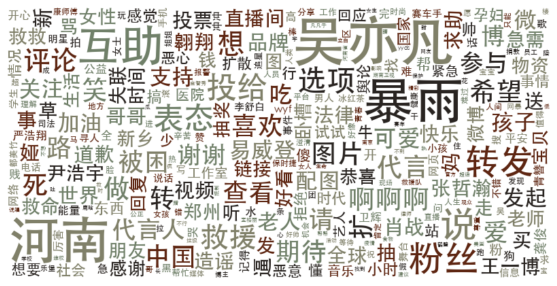

In [115]:
draw_cloud(frequency_dict,0,'general_wc')

In [117]:
ranked_frequency_dict = {k: v for k, v in sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True)}

In [120]:
# translation of the frequency_dict
translated_frequency_dict = {}
for key,value in tqdm(list(ranked_frequency_dict.items())[:1000],position=0):
    translated_key = translate_client.translate(key, target_language='en')['translatedText']
    translated_frequency_dict[translated_key] = value

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:29<00:00, 33.89it/s]


In [ ]:
translated_frequency_dict['Louis Vuitton']= translated_frequency_dict.pop('Easy Vuitton')

In [124]:
translated_frequency_dict

{'Wu Yifan': 54810,
 'rainstorm': 47568,
 'Henan': 47108,
 'Mutual assistance': 34528,
 'Say': 22620,
 'fan': 20966,
 'Forward': 684,
 'Stance': 15526,
 'Vote for': 15376,
 'Options': 14144,
 'Rescue': 990,
 'think': 716,
 'Do': 12068,
 'die': 682,
 'Comment': 11726,
 'smile': 11444,
 'Ah ah ah': 11266,
 'Endorsement': 10608,
 'picture': 3630,
 'hope': 10344,
 'Trapped': 10064,
 'Love': 1150,
 'road': 9934,
 'like': 1708,
 'Check': 9706,
 'China': 9556,
 'expect': 9512,
 'Expand': 9450,
 'change': 9330,
 'Please': 8744,
 'participate': 8236,
 'thanks': 8142,
 'Bo': 8062,
 'Spokesperson': 7876,
 'cute': 7312,
 'eat': 7238,
 'micro': 6688,
 'With pictures': 6420,
 'come on': 6338,
 'Initiate': 6282,
 'child': 740,
 'focus on': 6056,
 'support': 974,
 'elder': 5838,
 'new': 5530,
 'brand': 5458,
 'Ya': 5278,
 'Xiao Zhan': 5228,
 'video': 5202,
 'force': 1022,
 'world': 726,
 'worldwide': 700,
 'law': 5018,
 'purchase': 4966,
 'smoke': 4958,
 'Apologize': 4934,
 'vote': 4906,
 'elder broth

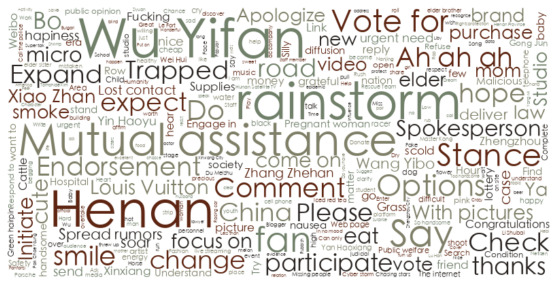

In [125]:
draw_cloud(translated_frequency_dict,0,'translated_general_wc')

# Topic extraction

In [131]:
from gensim import corpora, models, similarities
import gensim

In [129]:
# to decompose each sentence into key words refined by jieba
sentences = []
for i in tqdm(corpus_segregated,position=0):
    sentences.append(cut_words_with_pos(i))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 359585/359585 [06:48<00:00, 879.96it/s]


In [133]:
# bag of words model
dictionary = corpora.Dictionary(sentences)
corpus_topic = [dictionary.doc2bow(sentence) for sentence in sentences]


Exception ignored in: <function tqdm.__del__ at 0x7f53fce90ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/usr/local/lib/python3.9/dist-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [138]:
# fine-tuning of LDA
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary=dictionary, corpus=corpus_topic):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(3,16),position=0):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary,num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus_topic, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [139]:
# two lists contain the record of records and their corresponding coherence value
models, coherence_values = compute_coherence_values()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [09:18<00:00, 42.94s/it]


In [145]:
# use a difference measuring metric
coherence_values2 = []
for i in tqdm(models, position=0):
    coherence_values2.append(CoherenceModel(model=i,texts=sentences,coherence='c_v').get_coherence())

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:43<00:00,  3.34s/it]


In [173]:
# save the topics from gensim lda(ranging from topics #3-16)
with open('topic_models.pkl','wb') as f:
    pickle.dump(models,f)

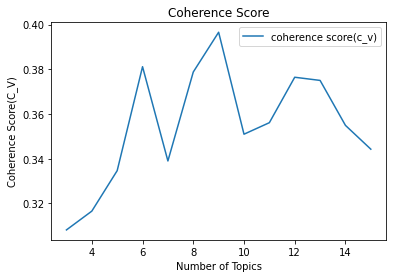

In [171]:
import matplotlib.pyplot as plt
x = range(3,16)
plt.plot(x, coherence_values2,label='coherence score(c_v)')
plt.title('Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score(C_V)')
plt.legend(loc='upper right')
plt.savefig('coherence_score_c_v.png')
plt.show()

In [151]:
# umass
coherence_values

[-4.904677951928467,
 -5.885018573681292,
 -6.621899961055021,
 -6.237991700079785,
 -6.0628889384107385,
 -7.027802423844864,
 -7.468099946513602,
 -7.2914028248962905,
 -7.773724665201658,
 -8.189877680990264,
 -8.590134947020465,
 -9.298977250085239,
 -8.679504630857469]

In [146]:
# c_v
coherence_values2

[0.3081756572294403,
 0.31657740166945636,
 0.3346762558533034,
 0.38117955040359974,
 0.33901713765987307,
 0.37880105545640197,
 0.3965892848149363,
 0.3509886029963149,
 0.3561355828290788,
 0.37646129631804465,
 0.3750445499920488,
 0.35493235582646615,
 0.34428815586162403]

In [140]:
coherence_values

[-4.904677951928467,
 -5.885018573681292,
 -6.621899961055021,
 -6.237991700079785,
 -6.0628889384107385,
 -7.027802423844864,
 -7.468099946513602,
 -7.2914028248962905,
 -7.773724665201658,
 -8.189877680990264,
 -8.590134947020465,
 -9.298977250085239,
 -8.679504630857469]

In [152]:
# after the analysis, the 3rd(6) topic model is the best one
lda_best = models[3]
#
topics_best = []
for topic in lda_best.print_topics(num_topics=6,num_words=20):
    topics_best.append(topic[1])


'\nfor topic in lda_second_best.print_topics(num_topics=6,num_words=20):\n    topics_second_best.append(topic[1])\n'

In [166]:
# the 9th topic model is the probably the best one as well
topics_second_best = []
lda_second_best = models[6]
for topic in lda_second_best.print_topics(num_topics=9,num_words=20):
    topics_second_best.append(topic[1])

In [153]:
# take topics to dictionary
def convert_to_dict(topic: str):
    frequency_dict = {}
    for i in [i.split('*') for i in topic.split('+')]:
        frequency_dict[i[1].strip().replace('"','')] = float(i[0]) * 1e3
    return frequency_dict

In [154]:
# take topics to a translated dictionary
def convert_to_dict_trans(topic: str):
    frequency_dict = {}
    for i in [i.split('*') for i in topic.split('+')]:
        frequency_dict[translate_client.translate(i[1].strip().replace('"',''), target_language='en')['translatedText']] = float(i[0]) * 1e3
    return frequency_dict

In [155]:
# draw a word cloud for each sub-topic
def cloud_each_topic(topics:list,model_name:str,trans:bool):
    for i in range(len(topics)):
        topic_words = topics[i]
        if trans:
            freq_dict = convert_to_dict_trans(topic_words)
        else:
            freq_dict = convert_to_dict(topic_words)
        draw_cloud(freq_dict,1,'%s_%d' %(model_name,i))

In [ ]:
# best model to word cloud
cloud_each_topic(topics_best,'best_model',False)

In [ ]:
# best model to word cloud as english
cloud_each_topic(topics_best,'best_model_trans',True)

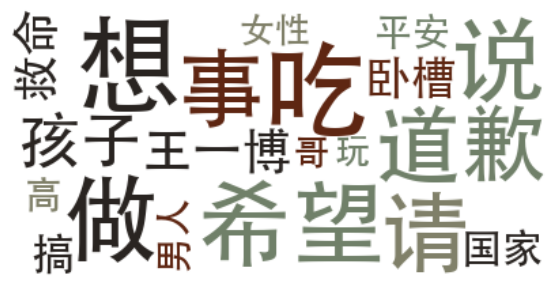

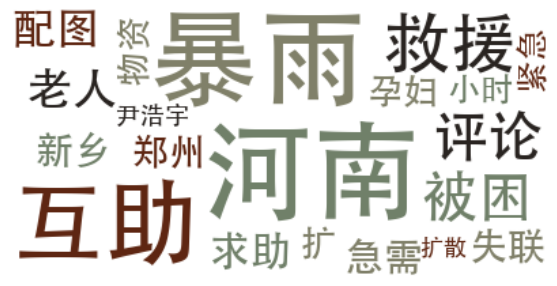

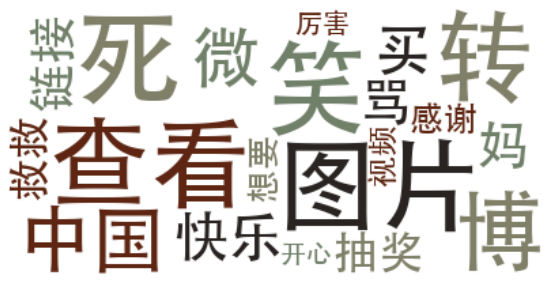

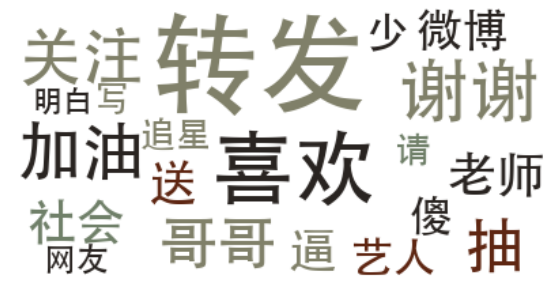

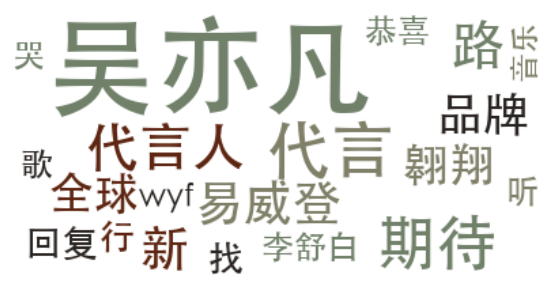

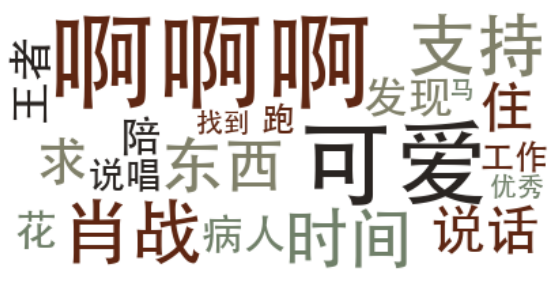

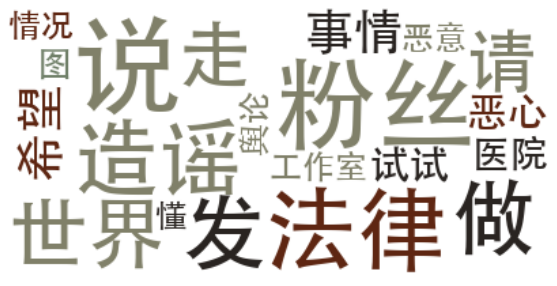

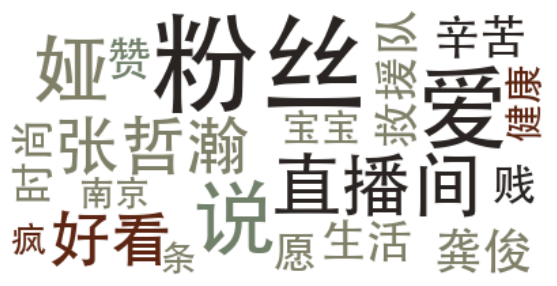

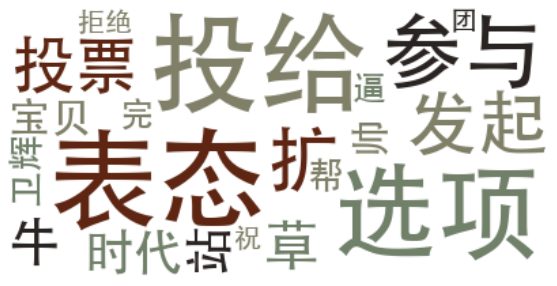

In [167]:
# 2nd best model to word cloud
cloud_each_topic(topics_second_best,'2ndbest_model',False)

In [ ]:
# 2nd best model to word cloud as English
cloud_each_topic(topics_second_best,'2ndbest_model_trans',True)

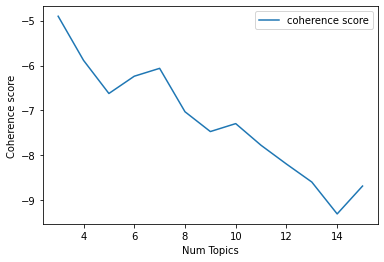

<Figure size 432x288 with 0 Axes>

In [169]:
# plot showing the coherence
x = range(3,16)
plt.plot(x, coherence_values,label='coherence score')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(loc='upper right')
plt.show()
plt.savefig('coherence_score.png')